# Nearest Earth Objects Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv("nasa.csv")

## EDA

In [5]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [7]:
data.shape

(90836, 10)

In [8]:
data.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [10]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [11]:
data.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

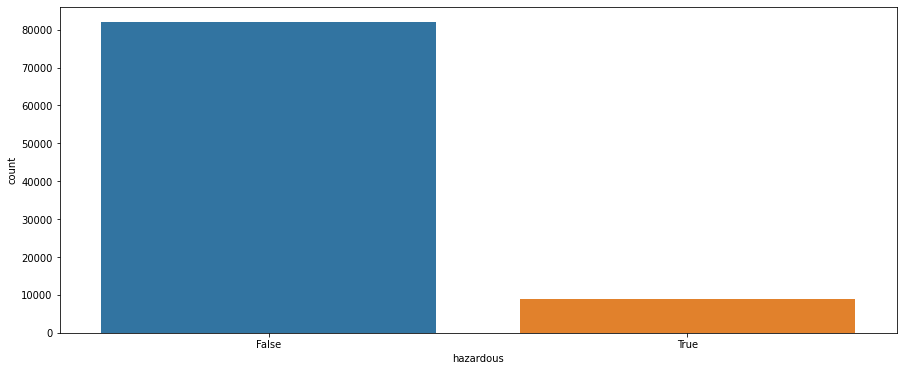

In [13]:
plt.figure(figsize=(15,6))
sns.countplot('hazardous',data=data)
plt.show()

We can tell that this is a highly imbalanced dataset...

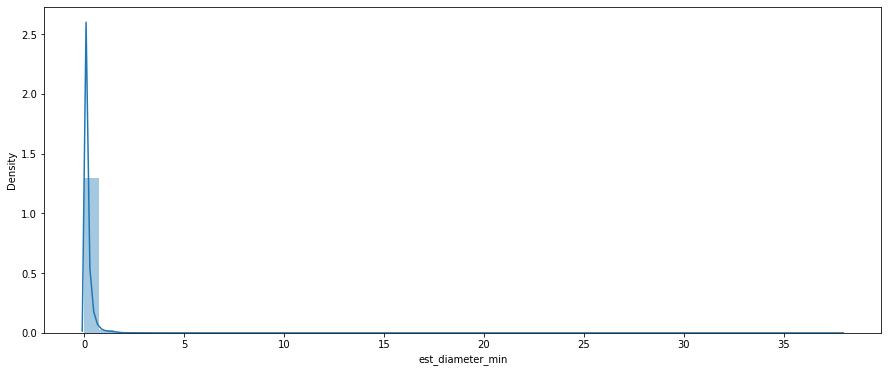

In [14]:
plt.figure(figsize=(15,6))
sns.distplot(data['est_diameter_min'])
plt.show()

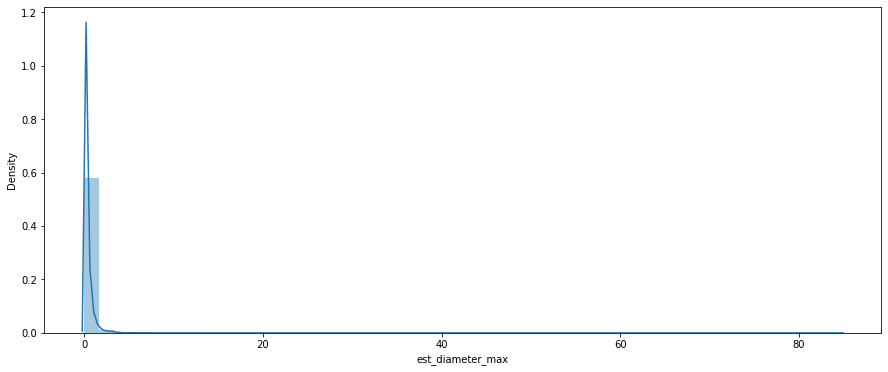

In [15]:
plt.figure(figsize=(15,6))
sns.distplot(data['est_diameter_max'])
plt.show()

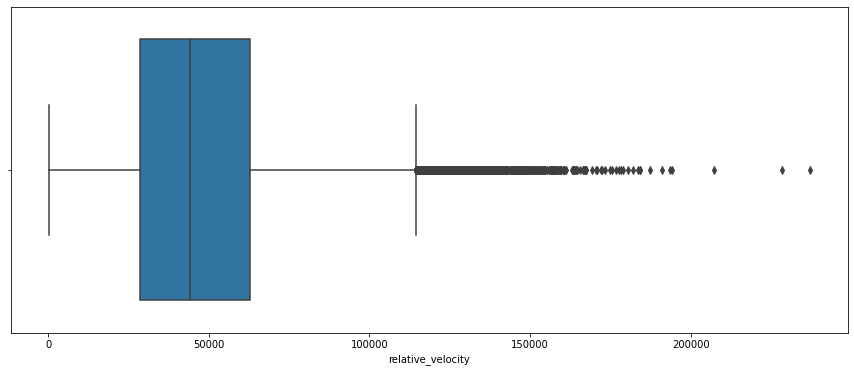

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(data['relative_velocity'])
plt.show()

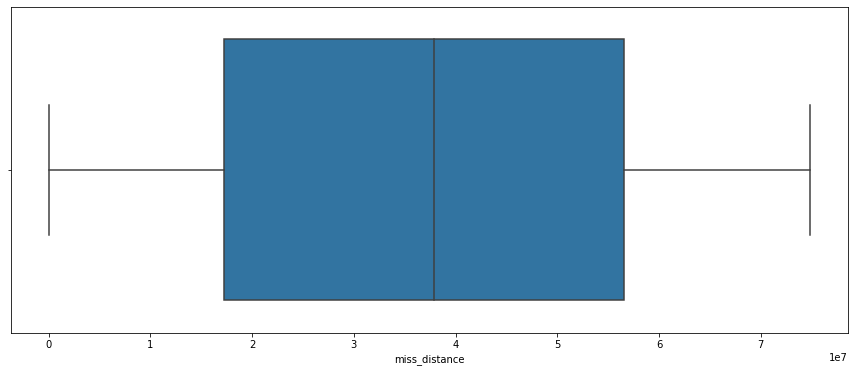

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(data['miss_distance'])
plt.show()

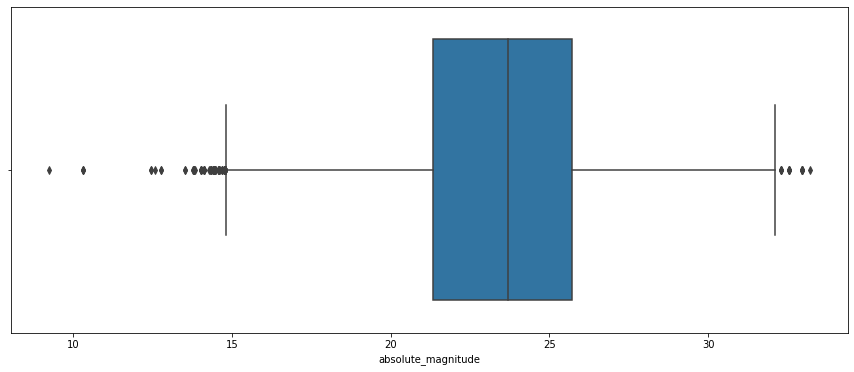

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(data['absolute_magnitude'])
plt.show()

In [20]:
data = data.drop(['orbiting_body','sentry_object'], axis=1)
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


### Separate numeric data

In [22]:
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
data[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


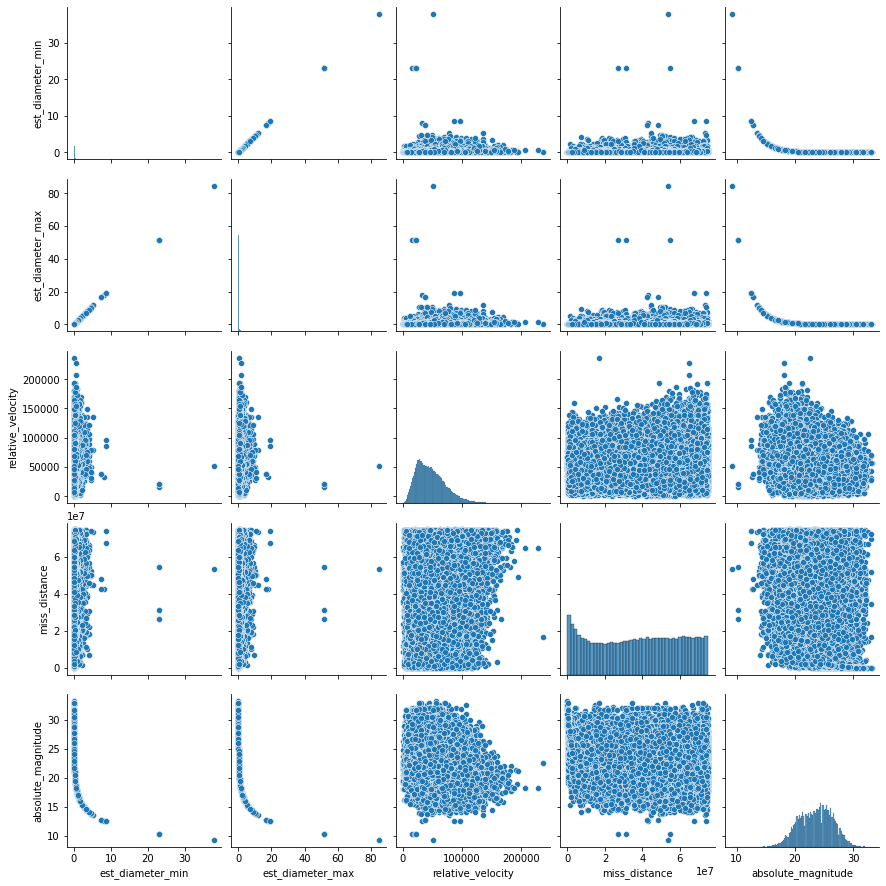

In [24]:
fig= sns.pairplot(data[numeric_df])

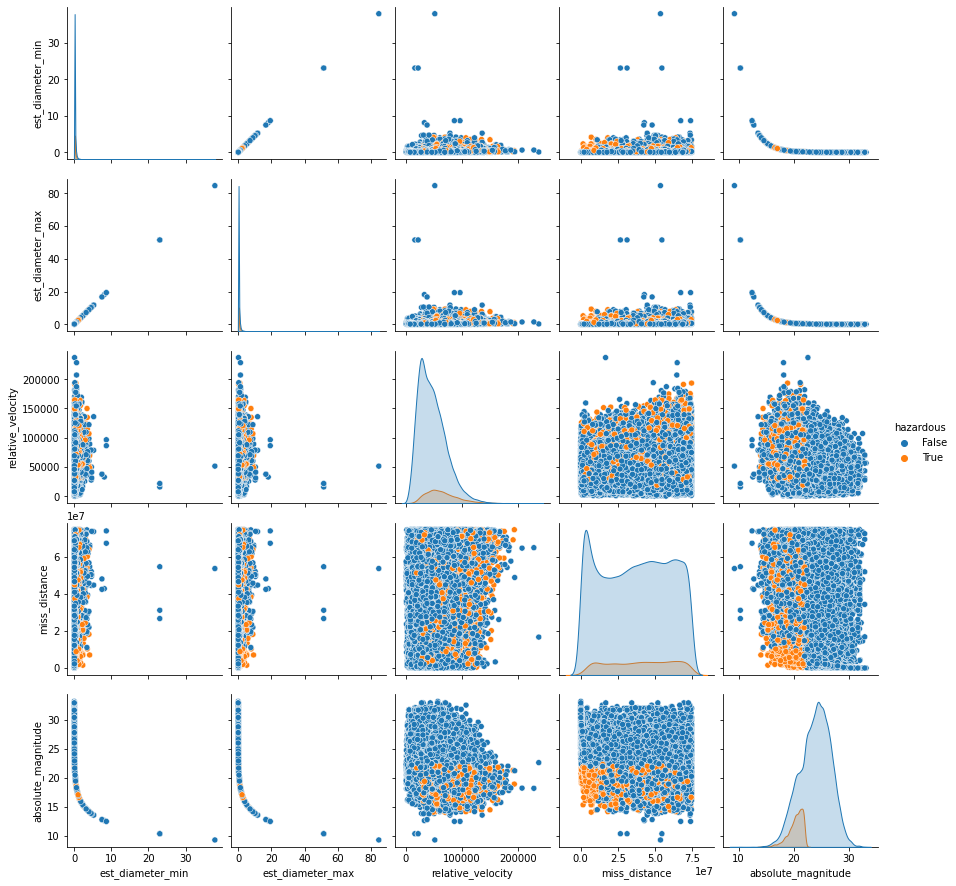

In [25]:
fig= sns.pairplot(data[numeric_df+['hazardous']],hue = 'hazardous')

## Modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score,KFold

In [30]:
x = data.drop(["id","name",'est_diameter_max',"est_diameter_max",'hazardous',"miss_distance","absolute_magnitude"] , axis = 1)
y = data.hazardous.astype("int")
print(x.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

(90836, 2) (90836,)


In [31]:
from imblearn.over_sampling import SMOTE
def SMOTE_f(X_train,y_train):
    sm=SMOTE(random_state=42)
    X_train_smo,y_train_smo=sm.fit_resample(X_train,y_train)
    return X_train_smo,y_train_smo

In [32]:
X_train_smo,y_train_smo=SMOTE_f(X_train,y_train)

In [44]:
def scores(X,y,model):
    kf=KFold(n_splits=10,shuffle=True,random_state=10)
    cv_score=cross_val_score(model,X,y)
    return cv_score

In [71]:
models={'XGBoost':XGBClassifier(),'KNN':KNeighborsClassifier(n_neighbors = 3),'Random Forest':RandomForestClassifier(),'Gaussian NB':GaussianNB(),'Decision Tree':DecisionTreeClassifier()}
all_scores={}
for name,model in models.items():
  all_scores[name]=max(scores(X_train_smo,y_train_smo,model))

In [72]:
for name,score in all_scores.items():
  print(f'{name}: {score}')

XGBoost: 0.8843765476780068
KNN: 0.6908571428571428
Random Forest: 0.9328355365918701
Gaussian NB: 0.6263095736980456
Decision Tree: 0.9500933368890243


In [73]:
best_score=sorted(all_scores.items(),key=lambda d:d[1],reverse=True)[0]

In [74]:
print(best_score)

('Decision Tree', 0.9500933368890243)


The Decision Tree model achieved a great performance! 